In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures

from sklearn.pipeline import Pipeline
plt.style.use("dark_background")

data = pd.read_csv("AirQualityUCI.csv")

data.head()

,Date,Time,CO,PT08S1,NMHC,C6H6,PT08S2,NOx,PT08S3,NO2,PT08S4,PT08S5,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [2]:
data["Date"] + " " + data["Time"]

0       3/10/2004 18:00:00
1       3/10/2004 19:00:00
2       3/10/2004 20:00:00
3       3/10/2004 21:00:00
4       3/10/2004 22:00:00
               ...        
9352     4/4/2005 10:00:00
9353     4/4/2005 11:00:00
9354     4/4/2005 12:00:00
9355     4/4/2005 13:00:00
9356     4/4/2005 14:00:00
Length: 9357, dtype: object

In [3]:
data["date_time"] = data["Date"] + " " + data["Time"]

In [4]:
data["date_time"] = pd.to_datetime(data["date_time"])

In [5]:
df = data[["date_time","CO"]]
df.head()

,date_time,CO
0,2004-03-10 18:00:00,2.6
1,2004-03-10 19:00:00,2.0
2,2004-03-10 20:00:00,2.2
3,2004-03-10 21:00:00,2.2
4,2004-03-10 22:00:00,1.6


In [6]:
dtf = DatetimeFeatures(variables="date_time",
                       features_to_extract=["year","month","hour"],
                       drop_original=True)

data = dtf.fit_transform(df)
data.head()

,CO,date_time_year,date_time_month,date_time_hour
0,2.6,2004,3,18
1,2.0,2004,3,19
2,2.2,2004,3,20
3,2.2,2004,3,21
4,1.6,2004,3,22


Text(0.5, 1.0, 'Sine transformation of hour')

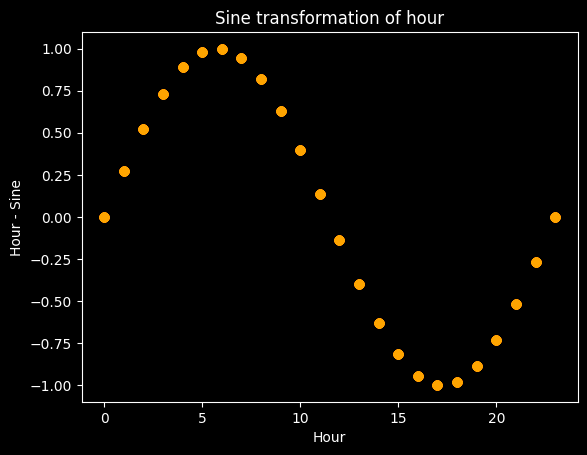

In [7]:
data["hour_sin"] = np.sin(data["date_time_hour"] /
                          data["date_time_hour"].max() * 2 * np.pi)

plt.scatter(data["date_time_hour"], data['hour_sin'],color = "orange")

plt.xlabel('Hour')
plt.ylabel('Hour - Sine')
plt.title('Sine transformation of hour')

Text(0.5, 1.0, 'Cosine transformation of hour')

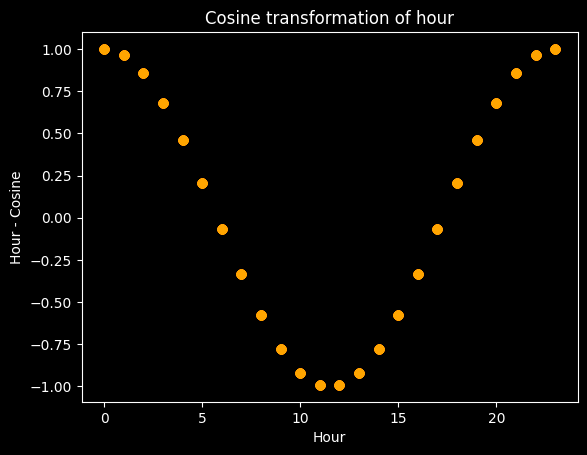

In [8]:
data["hour_cos"] = np.cos(data["date_time_hour"] /
                          data["date_time_hour"].max() * 2 * np.pi)

plt.scatter(data["date_time_hour"], data['hour_cos'],color = "orange")

plt.xlabel('Hour')
plt.ylabel('Hour - Cosine')
plt.title('Cosine transformation of hour')

In [9]:
data

,CO,date_time_year,date_time_month,date_time_hour,hour_sin,hour_cos
0,2.6,2004,3,18,-0.979084,0.203456
1,2.0,2004,3,19,-0.887885,0.460065
2,2.2,2004,3,20,-0.730836,0.682553
3,2.2,2004,3,21,-0.519584,0.854419
4,1.6,2004,3,22,-0.269797,0.962917
...,...,...,...,...,...,...
9352,3.1,2005,4,10,0.398401,-0.917211
9353,2.4,2005,4,11,0.136167,-0.990686
9354,2.4,2005,4,12,-0.136167,-0.990686
9355,2.1,2005,4,13,-0.398401,-0.917211
